# Multivariable Linear Regression Using Formulation

In [1]:
import numpy as np

In [2]:
# define the data
X = np.array([[1, 1, 2, 3], [1, 2, 3, 5], [1, 4, 3, -1], [1, 8, 6, 4]])
y = np.array([4, 8, 5, 10]).reshape(-1, 1)

In [3]:
w = np.linalg.inv(X.T@X)@X.T @ y

In [4]:
print('w1~n is', w[1:].flatten())
print('w0 is', w[0])

w1~n is [-9.75 19.25 -2.75]
w0 is [-16.5]


# Multivariable Linear Regression Using Scikit-learn

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
# define the data
X = np.array([[1, 2, 3], [2, 3, 5], [4, 3, -1], [8, 6, 4]])
y = np.array([4, 8, 5, 10])

In [7]:
reg = LinearRegression().fit(X, y)

print('w1 is', reg.coef_)
print('w0 is', reg.intercept_)

w1 is [-9.75 19.25 -2.75]
w0 is -16.49999999999995


# Polynomial Regression Using Scikit-learn

In [8]:
import matplotlib.pyplot as plt

In [21]:
## define the data
n_samples, n_features = 50, 8
# define function
f = lambda x : (x - 1/2)**2 + 1
# x has shape: (n_features, 1)
x = np.linspace(-1, 1, n_samples).reshape(-1, 1)
# add a noise (mean=0); X has shape: (n_samples, n_features)
noise = (np.random.randn(n_samples, n_features) - 0.5) 
X = np.repeat(f(x), n_features, axis=1) + noise
# y has shape: (n_features, 1)
y = f(x)

Text(0, 0.5, 'y')

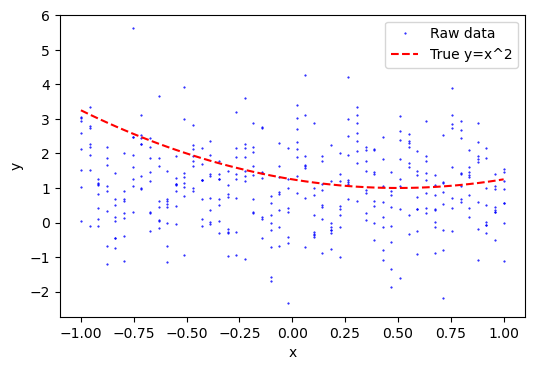

In [22]:
## plot the data
# here we plot the first two rows of X
plt.figure(dpi=100)
plt.plot(np.repeat(x.flatten(), n_features), X.T.flatten(), 'b.', markersize=1, label='Raw data')
plt.plot(x.flatten(), y.flatten(), 'r--', label='True y=x^2')
plt.legend(loc=1)
plt.xlabel('x')
plt.ylabel('y')

In [23]:
from sklearn.preprocessing import PolynomialFeatures

In [24]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X)

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
# we do this because polynomial regression is linear
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y)
# predicted from fitted model
y_predicted = poly_reg_model.predict(poly_features)

Text(0, 0.5, 'y')

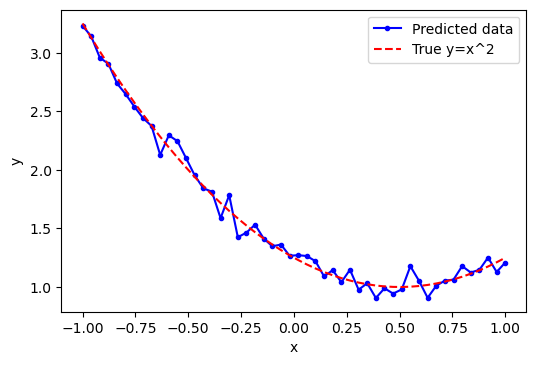

In [27]:
## plot the predicted data
plt.figure(dpi=100)
plt.plot(x.flatten(), y_predicted, 'b.-', label='Predicted data')
plt.plot(x.flatten(), y.flatten(), 'r--', label='True y=x^2')
plt.legend(loc=1)
plt.xlabel('x')
plt.ylabel('y')

# Ridge regression

In [45]:
from sklearn import linear_model

In [55]:
X = np.array([1, 2, 3]).reshape(-1, 1)
y = np.array([2, 1, 4]).reshape(-1, 1)

clf = linear_model.Ridge(alpha=0.1)
clf.fit(X, y)
print(clf.coef_)
print(clf.intercept_)

[[0.95238095]]
[0.42857143]


# LASSO regression

In [47]:
from sklearn import linear_model

In [57]:
X = np.array([1, 2, 3]).reshape(-1, 1)
y = np.array([2, 1, 4]).reshape(-1, 1)

clf = linear_model.Lasso(alpha=0.1)
clf.fit(X, y)
print(clf.coef_)
print(clf.intercept_)

[0.85]
[0.63333333]
